# Edge-IIoT multiclass detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../final_datasets/edge_iiot_multiclass.csv")

In [3]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,192.168.1.101,224.0.0.251,5353,5353,1.640646e+09,1.640646e+09,clear,60,0,...,109.000000,0.000000,0.500009,147.520426,295.035825,5.000607,4.916481,5.085931,0.000000,1.0
1,1,192.168.1.101,192.168.1.128.,61823,1883,1.640646e+09,1.640646e+09,clear,7,0,...,67.421913,2.798373,0.496637,0.010121,0.020379,0.003397,0.000038,0.014798,1.333333,1.0
2,2,192.168.1.128,192.168.1.101.,1883,61823,1.640646e+09,1.640646e+09,clear,6,0,...,60.684979,10.666667,0.413082,0.008261,0.019999,0.004000,0.000025,0.015083,0.800000,1.0
3,3,192.168.1.101,192.168.1.128.,61824,1883,1.640646e+09,1.640646e+09,clear,8,0,...,66.539462,3.534284,0.327577,0.010765,0.032861,0.004694,0.000019,0.020237,1.142857,1.0
4,4,192.168.1.128,192.168.1.101.,1883,61824,1.640646e+09,1.640646e+09,clear,7,0,...,60.587599,9.142857,0.280033,0.009191,0.032823,0.005470,0.000352,0.020512,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452657,1452657,192.168.0.170,192.168.0.128.,33090,80,1.638212e+09,1.638212e+09,XSS,7,0,...,82.673195,3.894584,0.436614,0.013064,0.029921,0.004987,0.000033,0.014345,0.666667,1.0
1452658,1452658,192.168.0.128,172.217.19.42.,53024,443,1.638208e+09,1.638208e+09,XSS,29,0,...,246.553345,5.253090,0.207315,50.200818,242.147978,8.648142,0.000025,46.080018,0.928571,1.0
1452659,1452659,172.217.19.42,192.168.0.128.,443,53024,1.638208e+09,1.638208e+09,XSS,22,0,...,230.664258,5.007316,0.227372,55.040139,242.071271,11.527203,0.000023,46.270100,1.238095,1.0
1452660,1452660,192.168.0.128,104.16.87.20.,35314,443,1.638212e+09,1.638212e+09,XSS,21,0,...,270.862291,2.540234,0.552930,1.419733,2.567657,0.128383,0.000070,0.701278,1.100000,1.0


In [31]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [32]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [33]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,clear,60,0,2940,0,109,0.000000,0,-1.000000,109,109,0,0.000000,0,0.000000,109.000000,0.000000,0.500009,147.520426,295.035825,5.000607,4.916481,5.085931,0.000000,1.0,3
1,clear,7,0,46,0,66,11.489125,133,-0.703465,60,90,30,17.407766,8,12.121212,67.421913,2.798373,0.496637,0.010121,0.020379,0.003397,0.000038,0.014798,1.333333,1.0,3
2,clear,6,0,4,0,60,1.414214,3,-0.953945,60,64,4,2.357023,0,0.000000,60.684979,10.666667,0.413082,0.008261,0.019999,0.004000,0.000025,0.015083,0.800000,1.0,3
3,clear,8,0,46,0,65,10.908712,120,-0.712583,60,90,30,16.782634,7,10.769231,66.539462,3.534284,0.327577,0.010765,0.032861,0.004694,0.000019,0.020237,1.142857,1.0,3
4,clear,7,0,4,0,60,1.414214,2,-0.953945,60,64,4,2.357023,0,0.000000,60.587599,9.142857,0.280033,0.009191,0.032823,0.005470,0.000352,0.020512,0.666667,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452657,XSS,7,0,102,0,74,38.548671,1486,-0.314987,60,162,102,52.092798,24,32.432432,82.673195,3.894584,0.436614,0.013064,0.029921,0.004987,0.000033,0.014345,0.666667,1.0,1
1452658,XSS,29,0,2588,0,149,199.727314,39891,0.145464,60,676,616,134.045177,133,89.261745,246.553345,5.253090,0.207315,50.200818,242.147978,8.648142,0.000025,46.080018,0.928571,1.0,1
1452659,XSS,22,0,2118,0,156,173.651951,30155,0.053547,60,668,608,111.315353,126,80.769231,230.664258,5.007316,0.227372,55.040139,242.071271,11.527203,0.000023,46.270100,1.238095,1.0,1
1452660,XSS,21,0,2552,0,181,206.000000,42436,0.064599,60,577,517,113.812155,167,92.265193,270.862291,2.540234,0.552930,1.419733,2.567657,0.128383,0.000070,0.701278,1.100000,1.0,1


In [34]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
1436840,SQL_injection,0
1450551,XSS,1
1331195,backdoor,2
0,clear,3
1331243,ddos,4
1345068,mitm,5
1345167,os_fingerprinting,6
1345445,password_attack,7
1416700,port_scanning,8
1436782,ransomware,9


In [35]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['SQL_injection',
 'XSS',
 'backdoor',
 'clear',
 'ddos',
 'mitm',
 'os_fingerprinting',
 'password_attack',
 'port_scanning',
 'ransomware',
 'uploading_attack',
 'vulnerability_scanner']

In [36]:
df = df[["LABEL_code"] + features].copy()

In [37]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [38]:
df.shape

(1452662, 25)

In [39]:
df_validation = df.sample(n = 250000)
df_features =  df[~df.isin(df_validation)].dropna()

In [40]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [41]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [42]:
y_train.value_counts()

3.0     771490
7.0      41296
8.0      11570
4.0       8023
0.0       3403
11.0      3018
10.0      1563
1.0       1229
6.0        156
5.0         54
9.0         34
2.0         27
Name: LABEL_code, dtype: int64

In [43]:
y_test.value_counts()

3.0     330639
7.0      17698
8.0       4959
4.0       3439
0.0       1458
11.0      1293
10.0       670
1.0        527
6.0         67
5.0         24
9.0         14
2.0         11
Name: LABEL_code, dtype: int64

In [44]:
df_validation["LABEL_code"].value_counts()

3.0     229066
7.0      12261
8.0       3553
4.0       2363
0.0        997
11.0       908
10.0       401
1.0        355
6.0         55
5.0         21
9.0         10
2.0         10
Name: LABEL_code, dtype: int64

In [45]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='macro')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 9, 2),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 80, 200, 20),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [46]:
df_to_tune = df_features.sample(n=100000)
best_hyperparams = tunne_together_XGBoost_classification(df_to_tune, features, verbose=False)

100%|██████████| 100/100 [09:01<00:00,  5.42s/trial, best loss: -0.74342113511515] 
The best hyperparameters are :  

{'colsample_bytree': 0.870175111191762, 'gamma': 3.5314247446253217, 'max_depth': 6.0, 'min_child_weight': 1.0, 'n_estimators': 160.0, 'reg_alpha': 0.0, 'reg_lambda': 0.41807834787460496}


In [47]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

                       precision    recall  f1-score   support

        SQL_injection     0.9843    0.9863    0.9853      1458
                  XSS     0.9943    0.9981    0.9962       527
             backdoor     1.0000    1.0000    1.0000        11
                clear     1.0000    1.0000    1.0000    330639
                 ddos     0.9957    0.9988    0.9972      3439
                 mitm     1.0000    0.7500    0.8571        24
    os_fingerprinting     0.0000    0.0000    0.0000        67
      password_attack     0.9994    0.9995    0.9995     17698
        port_scanning     0.9855    0.9996    0.9925      4959
           ransomware     1.0000    0.6429    0.7826        14
     uploading_attack     1.0000    0.9940    0.9970       670
vulnerability_scanner     0.9829    0.9768    0.9798      1293

             accuracy                         0.9996    360799
            macro avg     0.9118    0.8622    0.8823    360799
         weighted avg     0.9994    0.9996    0.9995 

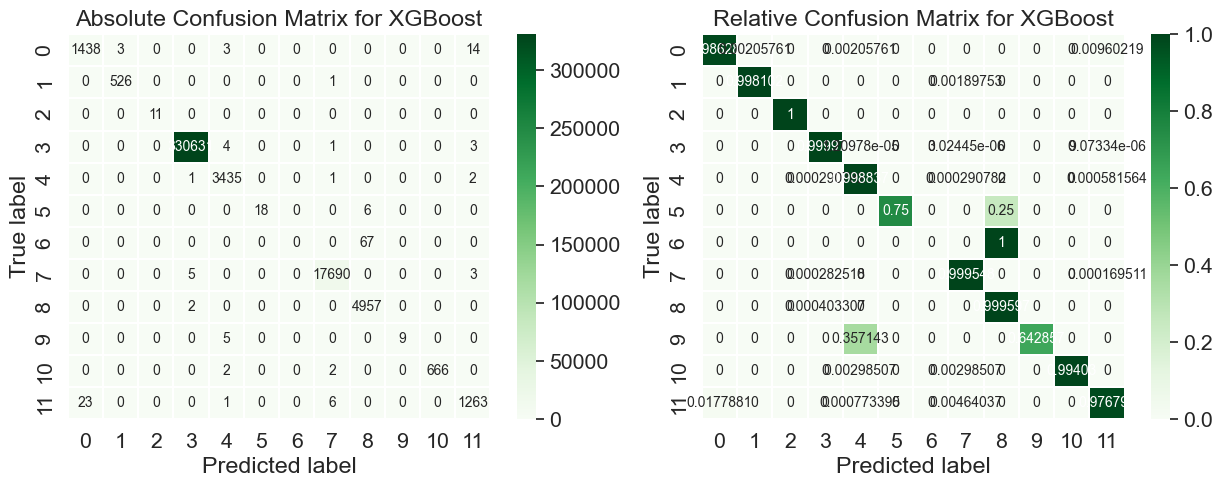

In [48]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [49]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [50]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=25)

24
                       precision    recall  f1-score   support

        SQL_injection     0.9896    0.9808    0.9852      1458
                  XSS     0.9962    0.9905    0.9933       527
             backdoor     1.0000    1.0000    1.0000        11
                clear     1.0000    1.0000    1.0000    330639
                 ddos     0.9983    0.9994    0.9988      3439
                 mitm     1.0000    0.8333    0.9091        24
    os_fingerprinting     0.0000    0.0000    0.0000        67
      password_attack     0.9995    0.9998    0.9996     17698
        port_scanning     0.9859    0.9992    0.9925      4959
           ransomware     1.0000    1.0000    1.0000        14
     uploading_attack     1.0000    0.9970    0.9985       670
vulnerability_scanner     0.9763    0.9876    0.9819      1293

             accuracy                         0.9996    360799
            macro avg     0.9121    0.8990    0.9049    360799
         weighted avg     0.9994    0.9996    0.99

                       precision    recall  f1-score   support

        SQL_injection     0.9869    0.9850    0.9859       997
                  XSS     0.9972    0.9972    0.9972       355
             backdoor     1.0000    0.9000    0.9474        10
                clear     1.0000    1.0000    1.0000    229066
                 ddos     0.9979    0.9979    0.9979      2363
                 mitm     1.0000    0.7143    0.8333        21
    os_fingerprinting     0.0000    0.0000    0.0000        55
      password_attack     0.9997    0.9998    0.9998     12261
        port_scanning     0.9834    0.9994    0.9913      3553
           ransomware     1.0000    0.9000    0.9474        10
     uploading_attack     1.0000    0.9975    0.9988       401
vulnerability_scanner     0.9813    0.9835    0.9824       908

             accuracy                         0.9996    250000
            macro avg     0.9122    0.8729    0.8901    250000
         weighted avg     0.9994    0.9996    0.9995 

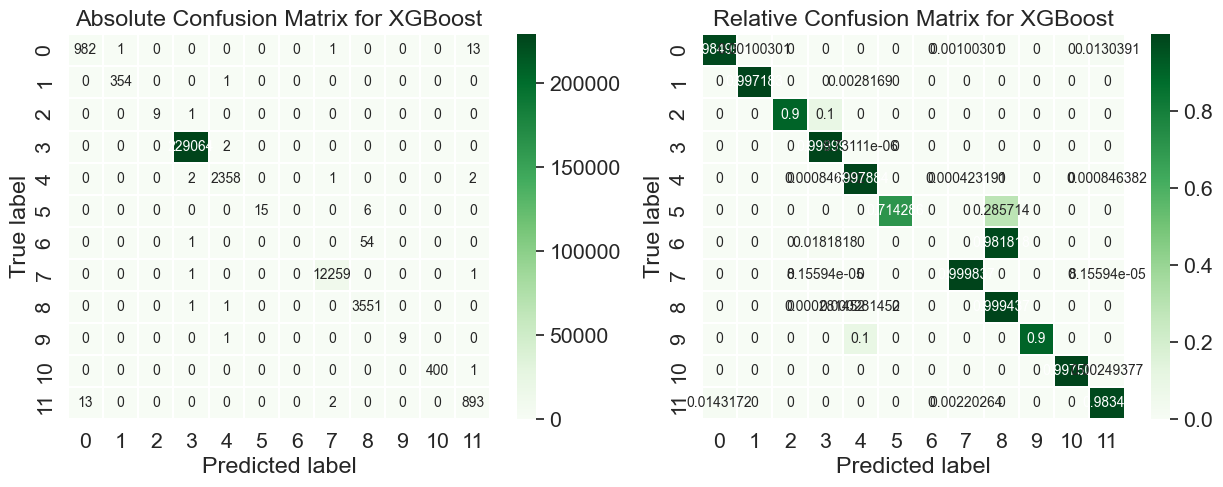

In [51]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array, digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

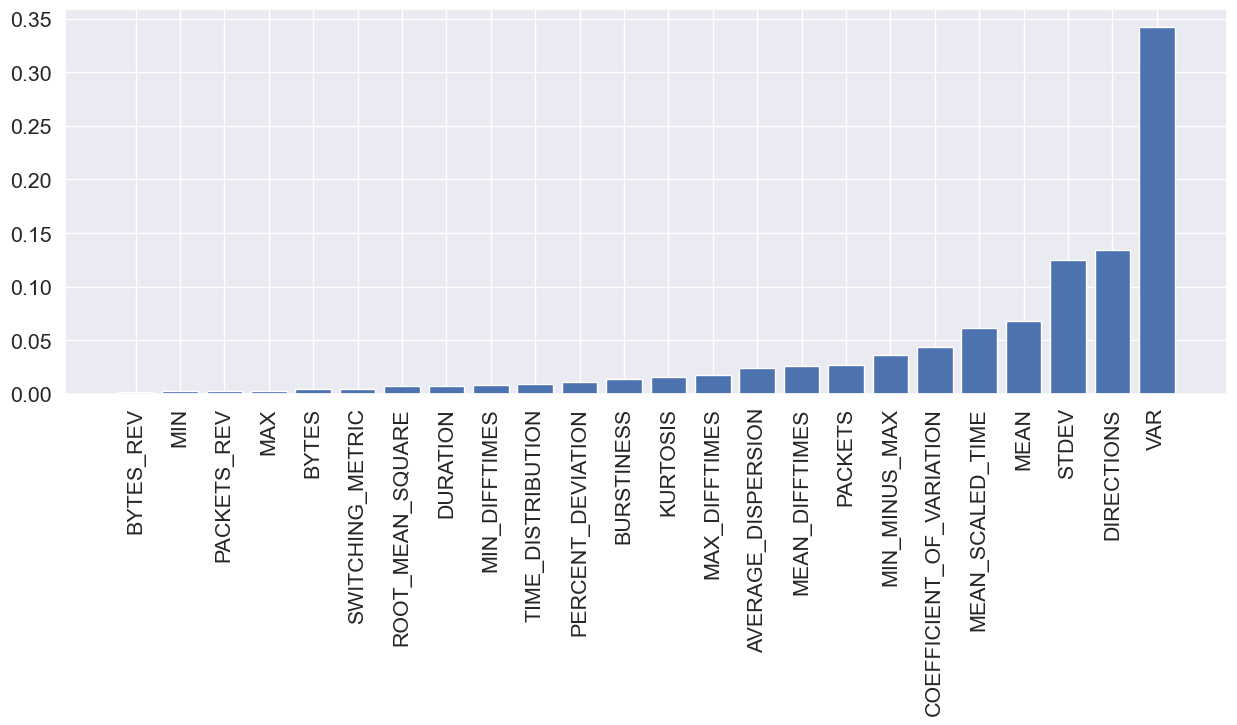

In [52]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [53]:
feat_importances.to_dict()

{'BYTES_REV': 0.001746871741488576,
 'MIN': 0.002703895326703787,
 'PACKETS_REV': 0.0029524480924010277,
 'MAX': 0.0032141506671905518,
 'BYTES': 0.004627672955393791,
 'SWITCHING_METRIC': 0.005091795232146978,
 'ROOT_MEAN_SQUARE': 0.007260370533913374,
 'DURATION': 0.00766425346955657,
 'MIN_DIFFTIMES': 0.008723615668714046,
 'TIME_DISTRIBUTION': 0.00954044982790947,
 'PERCENT_DEVIATION': 0.010805672034621239,
 'BURSTINESS': 0.014113646931946278,
 'KURTOSIS': 0.01557807344943285,
 'MAX_DIFFTIMES': 0.017425887286663055,
 'AVERAGE_DISPERSION': 0.024574652314186096,
 'MEAN_DIFFTIMES': 0.026213737204670906,
 'PACKETS': 0.026831164956092834,
 'MIN_MINUS_MAX': 0.03611459210515022,
 'COEFFICIENT_OF_VARIATION': 0.0441376231610775,
 'MEAN_SCALED_TIME': 0.061581481248140335,
 'MEAN': 0.06769382208585739,
 'STDEV': 0.125278040766716,
 'DIRECTIONS': 0.1343522071838379,
 'VAR': 0.3417738974094391}